In [1]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.utils import resample
from matrix_creation import polynomial_features, standard_scaler,scale_features_by_intercept_use
from main_methods import OLS_parameters,Ridge_parameters,gradient_descent_OLS,gradient_descent_ridge
from errors import MSE,R2
import matplotlib.pyplot as plt


In [2]:
from plotting_exploration import plot_mse,plot_r2,explore_lambda,explore_polynomial_degree

In [3]:
# Runge's function

# parameters to explore
n_datapoints = 100 # changed and ran code with different values. Could have been implemented as a list and looped over, but regarded as not necessary.
standard_deviation = 0.1 # for noise, should we play around with this values as well in analysis?
p = 15 # polynomial degree

lambda_range = (-1,-5) # range of lambda values for np.log
lambda_n = 50 # number lambda values to explore

np.random.seed(250)  # ensure reproducibility

# generating data without noise
x = np.linspace(-1, 1, num=n_datapoints)
y = 1 / (1 + 25 * x**2)

# generating data with noise
x_noise = x
y_noise = 1 / (1 + 25 * x_noise**2) + np.random.normal(0, standard_deviation, n_datapoints)


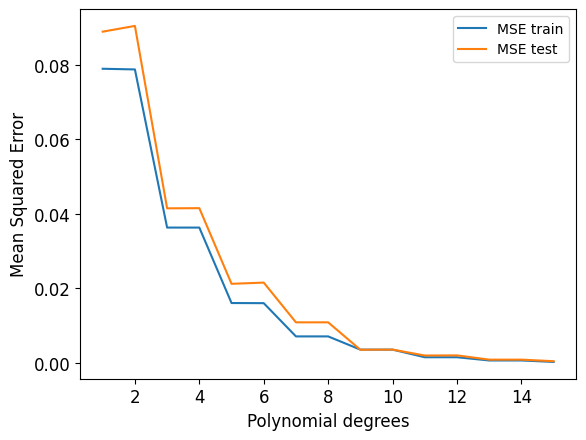

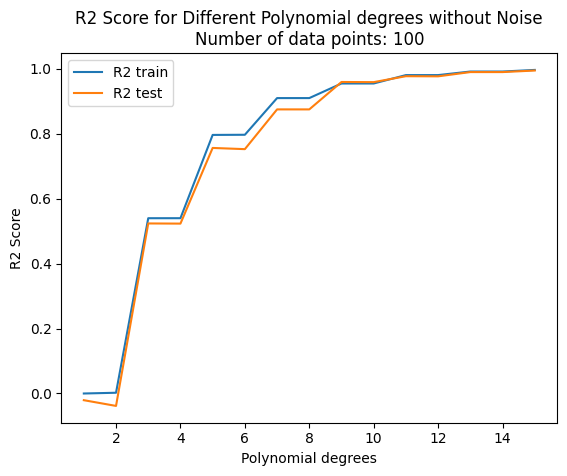

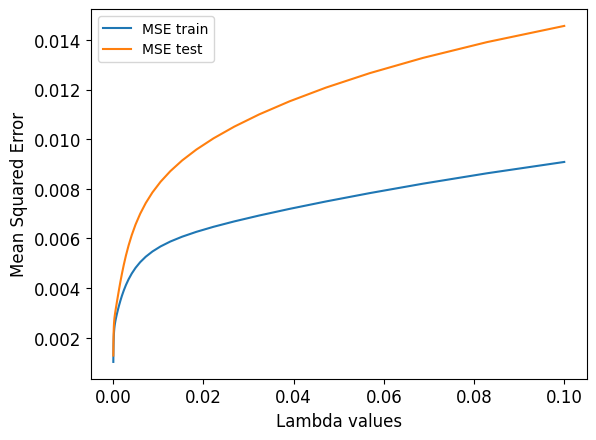

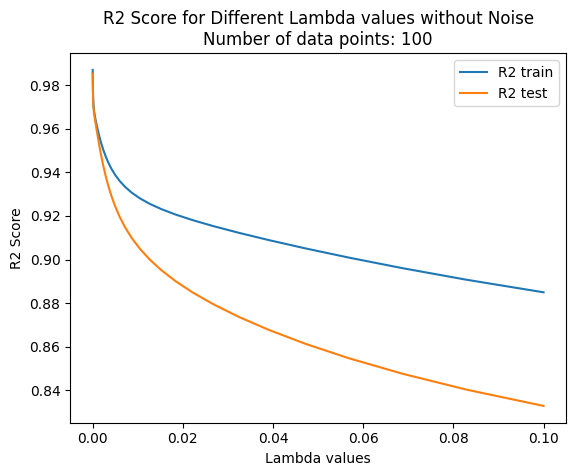

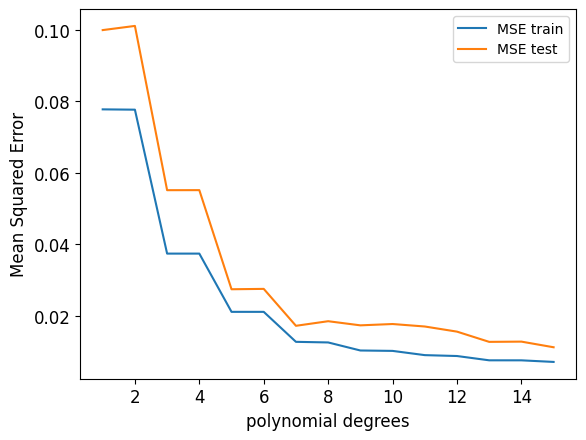

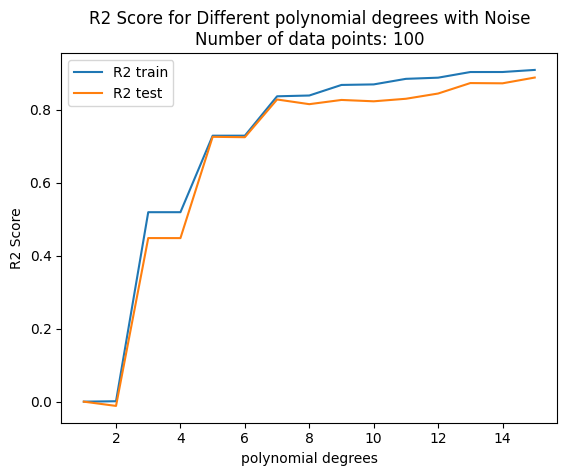

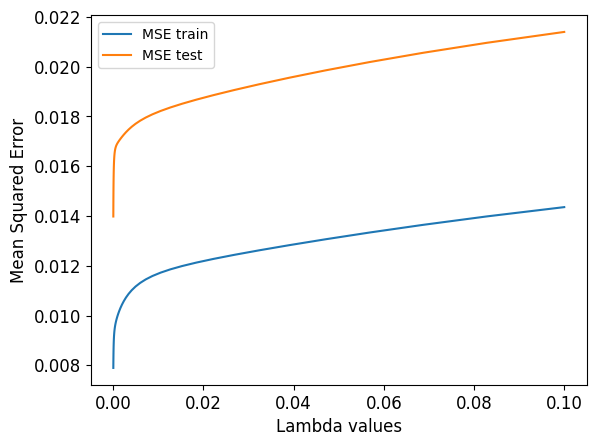

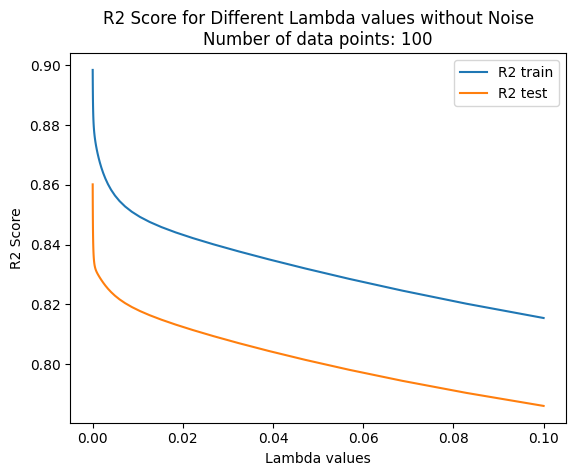

In [4]:
# Runge's function analysis
##################################################

use_intercept = True # changed to variable to easily switch between True and False

# No noise
# creating design matrix with polynomial features: p
X = polynomial_features(x, p,intercept=use_intercept) # intercept=True gives intercept column = 0 in standard scaler if intercept is True, and hence division by 0. 

# test and train dataset, and scaling of X_train and X_test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

X_train_scaled, X_test_scaled = scale_features_by_intercept_use(X_train, X_test, use_intercept)

# scaled data for features as input 
polynomial_degree, mse_train, mse_test, r2_train, r2_test = explore_polynomial_degree(X_train_scaled, X_test_scaled, y_train, y_test, p, use_intercept=use_intercept)
plot_mse(n_datapoints, polynomial_degree,"Polynomial degrees", mse_train, mse_test, noise=False)
plot_r2(n_datapoints, polynomial_degree,"Polynomial degrees", r2_train, r2_test, noise=False)

lambdas, mse_train_ridge, mse_test_ridge, r2_train_ridge, r2_test_ridge = explore_lambda(X_train_scaled, X_test_scaled, y_train, y_test,lambda_range,lambda_n)
plot_mse(n_datapoints, lambdas,"Lambda values", mse_train_ridge, mse_test_ridge, noise=False)
plot_r2(n_datapoints, lambdas,"Lambda values", r2_train_ridge, r2_test_ridge, noise=False)


##################################################

# With noise
# creating design matrix with polynomial features: p
X_noise = polynomial_features(x_noise, p,intercept=use_intercept) # intercept=True gives intercept column = 0 in standard scaler if intercept is True, and hence division by 0. Leaving intercept out since Ridge regression handles this

# test and train dataset, and scaling of X_train and X_test
X_train_noise, X_test_noise, y_train_noise, y_test_noise = train_test_split(X_noise, y_noise, random_state=1, test_size=0.2)
X_train_scaled_noise, X_test_scaled_noise = scale_features_by_intercept_use(X_train_noise, X_test_noise, use_intercept)

# scaled data for features as input 
polynomial_degree, mse_train, mse_test, r2_train, r2_test = explore_polynomial_degree(X_train_scaled_noise, X_test_scaled_noise, y_train_noise, y_test_noise, p, use_intercept=use_intercept)
plot_mse(n_datapoints, polynomial_degree, "polynomial degrees", mse_train, mse_test, noise=True)
plot_r2(n_datapoints, polynomial_degree, "polynomial degrees",r2_train, r2_test, noise=True)

lambdas, mse_train_ridge, mse_test_ridge, r2_train_ridge, r2_test_ridge = explore_lambda(X_train_scaled_noise, X_test_scaled_noise, y_train_noise, y_test_noise,lambda_range,lambda_n)
plot_mse(n_datapoints, lambdas,"Lambda values", mse_train_ridge, mse_test_ridge, noise=False)
plot_r2(n_datapoints, lambdas,"Lambda values", r2_train_ridge, r2_test_ridge, noise=False)


BIAS-VARIANCE TRADEOFF

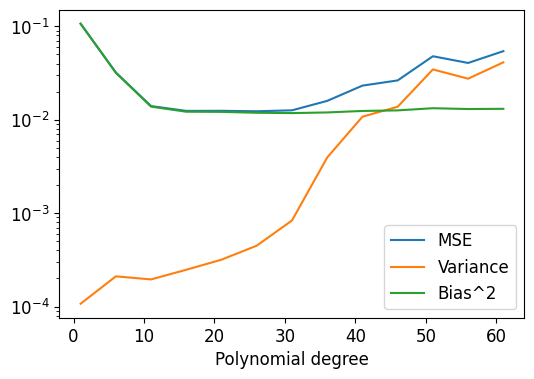

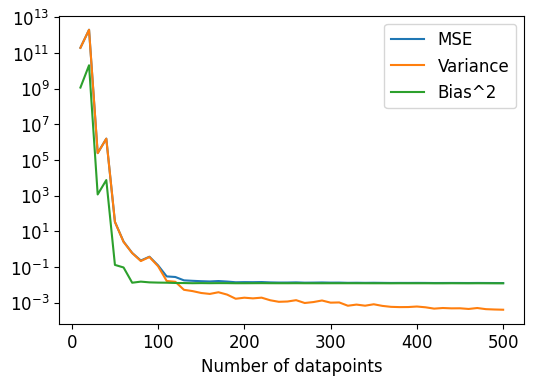

In [5]:
# BIAS-VARIANCE TRADEOFF 
from errors import squared_bias, variance, MSE
from plotting_exploration import plot_bias_variance_tradeoff_polynomial_degree, plot_bias_variance_tradeoff_datapoints

# define the test and train dataset here, because using a very high polynomial degree (not needed for the other plots)
use_intercept = True # changed to variable to easily switch between True and False
np.random.seed(350)
# using noisy data
x_noise = np.linspace(-1, 1, num=1000)
y_noise = (1 / (1 + 25 * x_noise**2)) + np.random.normal(0, 0.1, size=x_noise.size)
p = 65 # polynomial degrees
X_noise = polynomial_features(x_noise, p, intercept=use_intercept)
X_train_noise, X_test_noise, y_train_noise, y_test_noise = train_test_split(X_noise, y_noise, random_state=1, test_size=0.2)

# with different polynomial degrees
plot_bias_variance_tradeoff_polynomial_degree(X_train_noise, y_train_noise, X_test_noise, y_test_noise, use_intercept=True)

# with different data points
plot_bias_variance_tradeoff_datapoints(X_train_noise, y_train_noise, X_test_noise, y_test_noise)

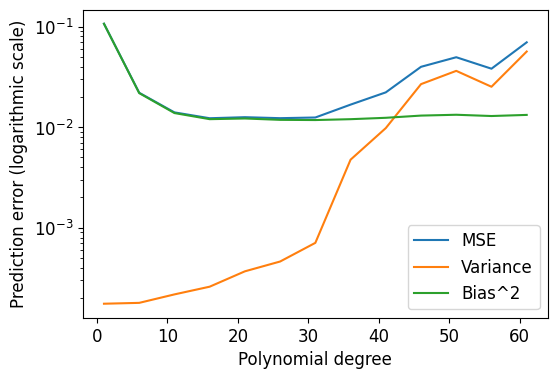

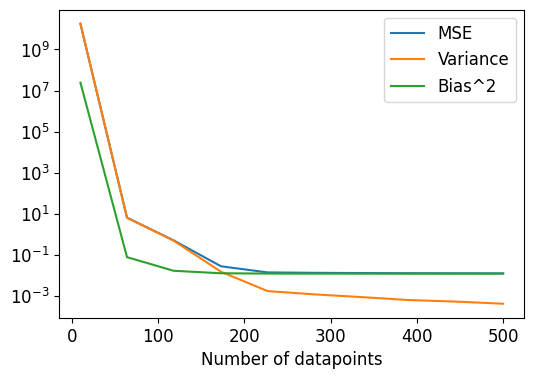

In [6]:
# BIAS-VARIANCE TRADEOFF SCIKIT-LEARN WAY FOR COMPARISON 

from plotting_exploration import plot_bias_variance_tradeoff_datapoints_sklearn, plot_bias_variance_tradeoff_polynomial_degree_sklearn

plot_bias_variance_tradeoff_polynomial_degree_sklearn(x_noise, y_noise, p=p) # with changing polynomial degree
plot_bias_variance_tradeoff_datapoints_sklearn(x_noise, y_noise) # with changing data points